# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

Importação das bibliotecas utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Carregamento da base CSV

In [2]:
df = pd.read_csv("previsao_de_renda.csv")
df.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


Conversão da coluna "data_ref" para o tipo datetime

In [3]:
df['data_ref'] = pd.to_datetime( df['data_ref'] )

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

#### Definição da função para exibir os gráficos. Como serão todos com a mesma estrutura, mudando apenas a coluna a ser observada, fica mais simples declarar o código apenas uma vez.

In [4]:
def gera_grafico_discretas(col_name, hline=[]):
    

    # Criacao da tabela de frequencia cruzada
    tab = pd.crosstab(index = df['data_ref'], columns = df[col_name], normalize='index')


    # Gráfico
    ax = tab.plot.bar(stacked = True, figsize=[15,5])


    # Título do gráfico
    ax.set_title(f"Proporção dos valores da variável '{col_name}' ao decorrer dos meses.")


    # Valores de cada coluna no eixo X
    labels_x = df['data_ref'].dt.strftime("%m/%Y").unique()
    ax.set_xticklabels(labels_x, rotation=10)
    
    # Limpar legenda X
    ax.set_xlabel("")
    
    
    # Traçar uma linha horizontal no gráfico
    for y in hline:
        ax.axhline(y=y, color = 'black', linestyle = ':')
    

    plt.show()


### Proporção ao decorrer dos meses: homens X mulheres

* Aparentemente não houve uma mudança significativa na estabilidade da variável "sexo" ao longo do tempo. 
* Pode-se notar que as proporções de cada sexo não variaram nem 10% durante todo o período.

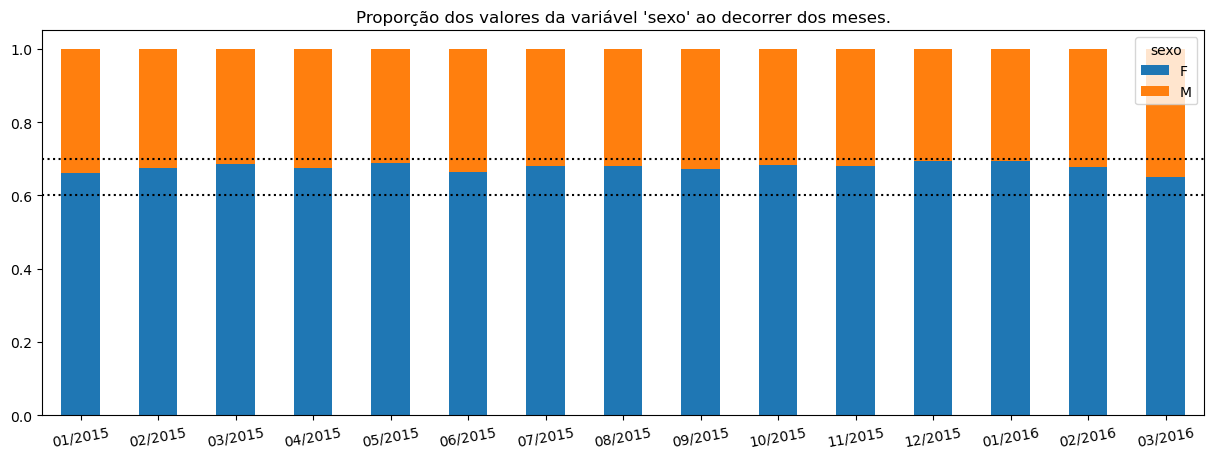

In [5]:
gera_grafico_discretas(col_name = 'sexo', hline = [0.6, 0.7])

#### Proporção ao decorrer dos meses: possuem_veículo X não_possuem

* Para a variável "posse_de_veiculo", também não houve uma mudança significativa com o passar do tempo.
* O mês em que mais mudou, foi um aumento de cerca de apenas 5% e logo após voltou a cair para a proporção inicial.

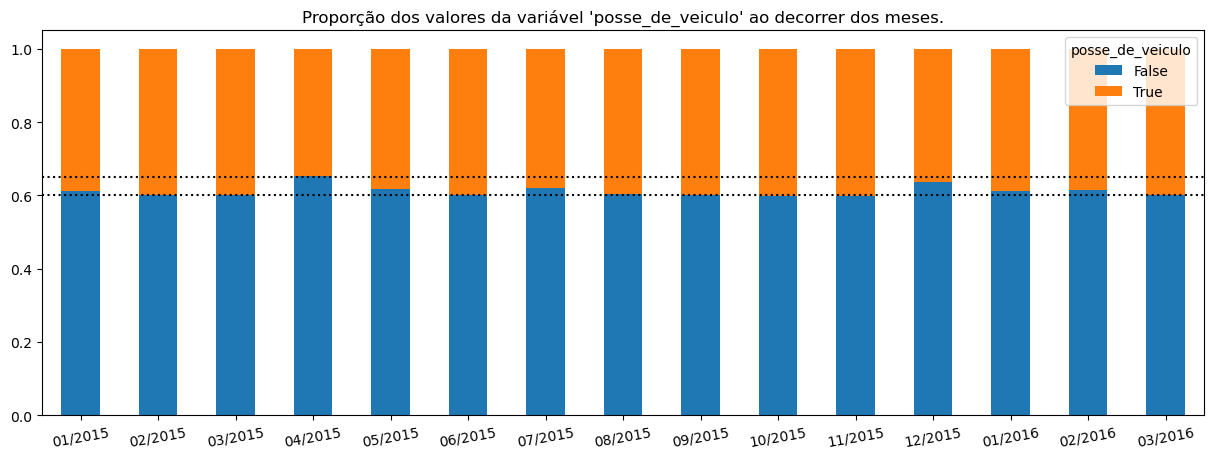

In [6]:
gera_grafico_discretas('posse_de_veiculo', hline = [0.6, 0.65])

#### Proporção ao decorrer dos meses: possuem_imovel X não_possuem

* A variável "posse_de_imovel" também não teve uma mudança significativa na estabilidade com o passar do tempo.
* O mês em que mais variou, foi cerca de apenas 5%.

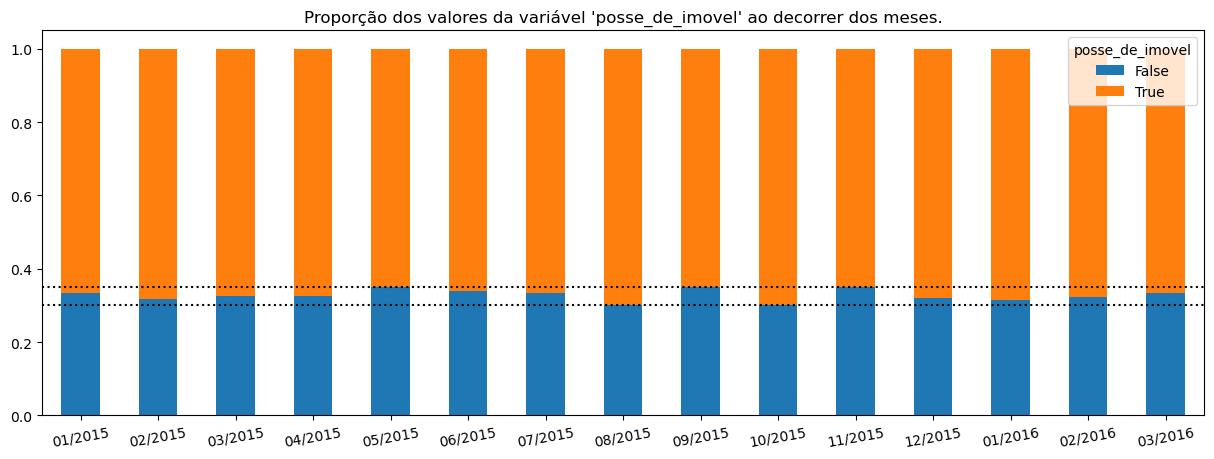

In [7]:
gera_grafico_discretas('posse_de_imovel', hline = [0.3, 0.35])

#### Proporção ao decorrer dos meses por "tipo_renda"

* Não houve nenhum mudança significativa na estabilidade da variavel "tipo_renda", todas as proporções se mantiveram com poucas alterações durante todo o período observado.

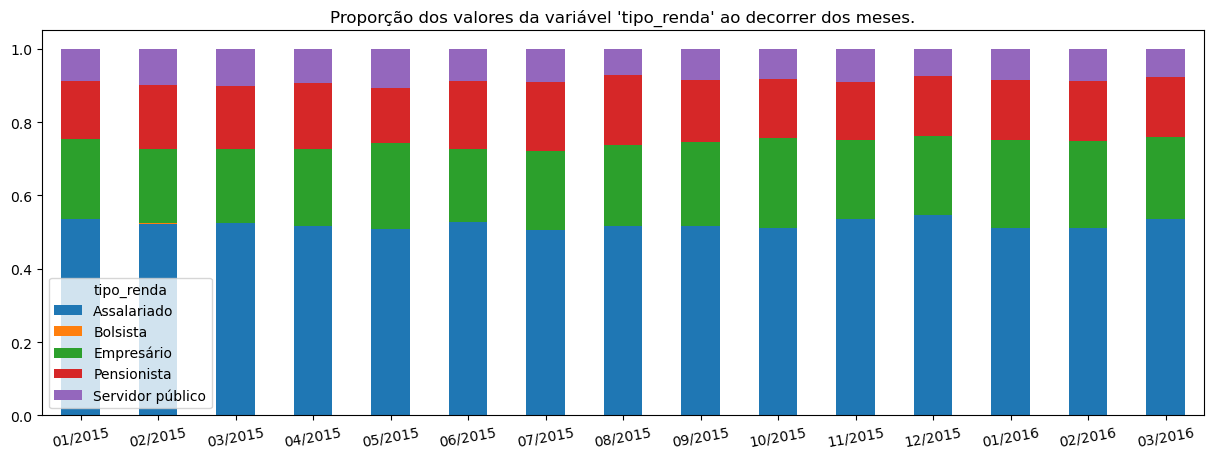

In [8]:
gera_grafico_discretas('tipo_renda')

#### Proporção ao decorrer dos meses por "educacao"

* Das variáveis discretas observadas, a que teve uma maior mudança siginificativa na estabilidade foi a "educação".
* A proporção de pessoas apenas com ensino Secundário, caiu 20% em apenas 3 meses (ago/2015 à nov/2025).
* De forma proporcional, o número de pessoas com Superior Completo, também aumentou em 20% no mesmo período.

###### Esta é uma alteração importante a ser observada, visto que o nível de educação influencia na renda, conforme observado no exercício da lista 1 deste mesmo módulo.

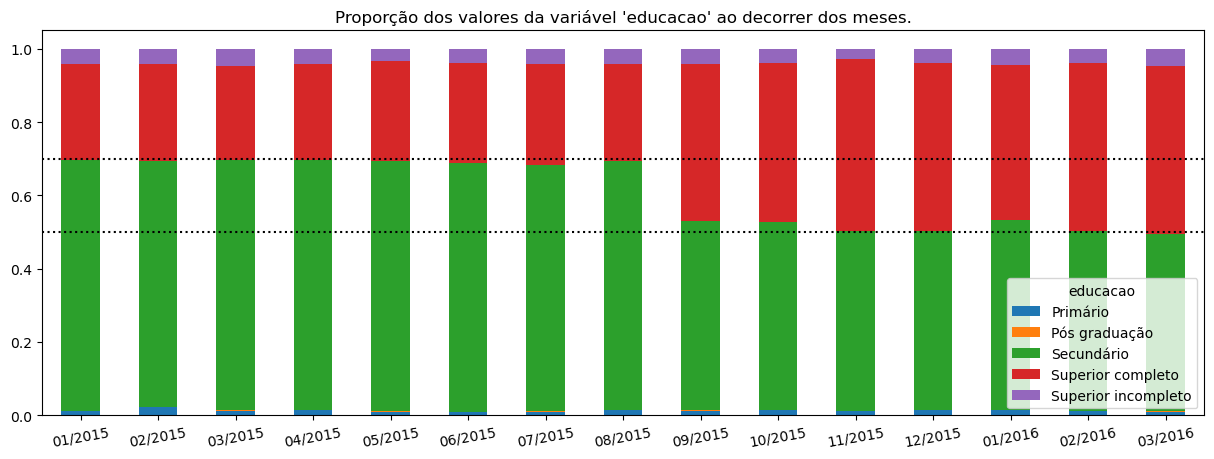

In [9]:
gera_grafico_discretas('educacao', hline = [0.5, 0.7])

#### Proporção ao decorrer dos meses por "estado_civil"

* Não houve mudanças significativas na estabilidade da variavel "estado_civil" no período observado.
* Todos os dominíos da variável permaneceram com poucas alterações em suas proporções.

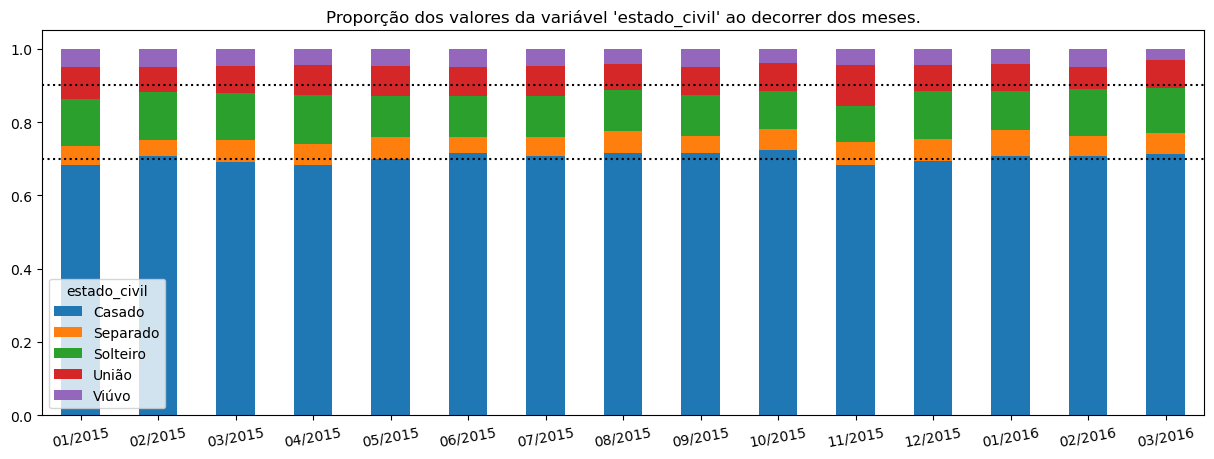

In [10]:
gera_grafico_discretas('estado_civil', hline = [0.7, 0.9])

#### Proporção ao decorrer dos meses por "tipo_residencia"

* Variável "tipo_residencia" também sem mudanças siginificativas, em todo o período o domínio "casa" ocupou mais de 90% do total. 

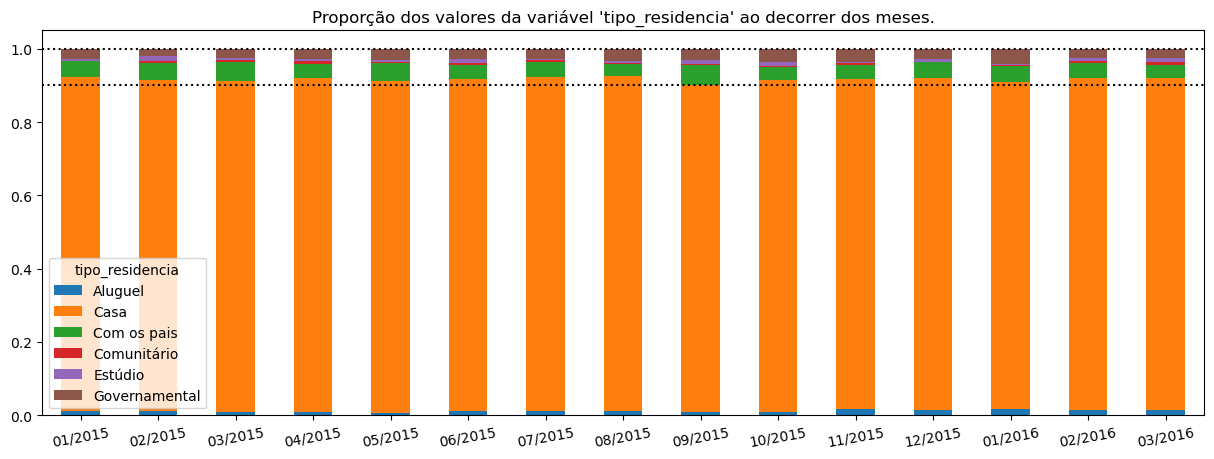

In [11]:
gera_grafico_discretas('tipo_residencia', hline = [0.9, 1])

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

#### Definição da função para exibir os gráficos. Como serão todos com a mesma estrutura, mudando apenas a coluna a ser observada, fica mais simples declarar o código apenas uma vez.

In [12]:
def gera_grafico_continuas(col_name):
    
    
    # Tamanho da figura
    plt.figure(figsize=[15,5])
    
    
    # Gráfico
    ax = sns.pointplot(data = df, 
                       x = 'data_ref', 
                       y = col_name, 
                       errorbar = ('ci', 90))
    
    # Titulo do gráfico
    ax.set_title(f"Média da variável '{col_name}' ao decorrer dos meses")
    
    
    # Ajuste valores do eixo X
    labels_x = df['data_ref'].dt.strftime("%m/%Y").unique()
    ax.set_xticklabels(labels_x)
    
    
    # Calcula a mediana dos valores do eixo Y pra traçar uma linha horizontal no gráfico (mediana das médias)
    mediana = df.groupby('data_ref')[col_name].mean().median()
    ax.axhline(y = mediana, color = 'red', linestyle = '--')
    
    
    # Remove label eixo x
    ax.set_xlabel("")
    
    
    # Exibe o gráfico
    plt.show()
    

### Gráfico da renda média média ao decorrer dos meses

* Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

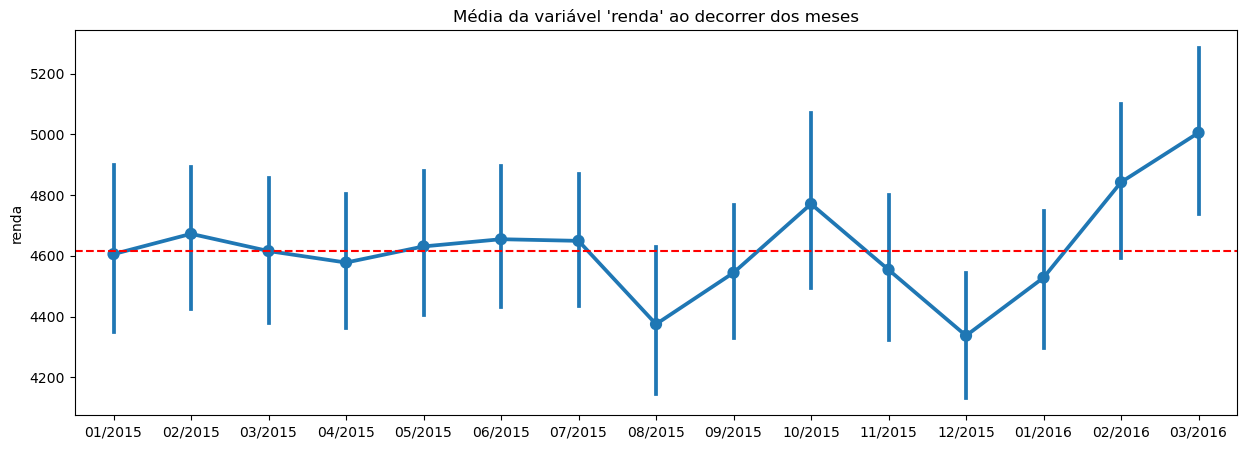

In [13]:
gera_grafico_continuas('renda')

### Gráfico da idade média ao decorrer dos meses

* Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

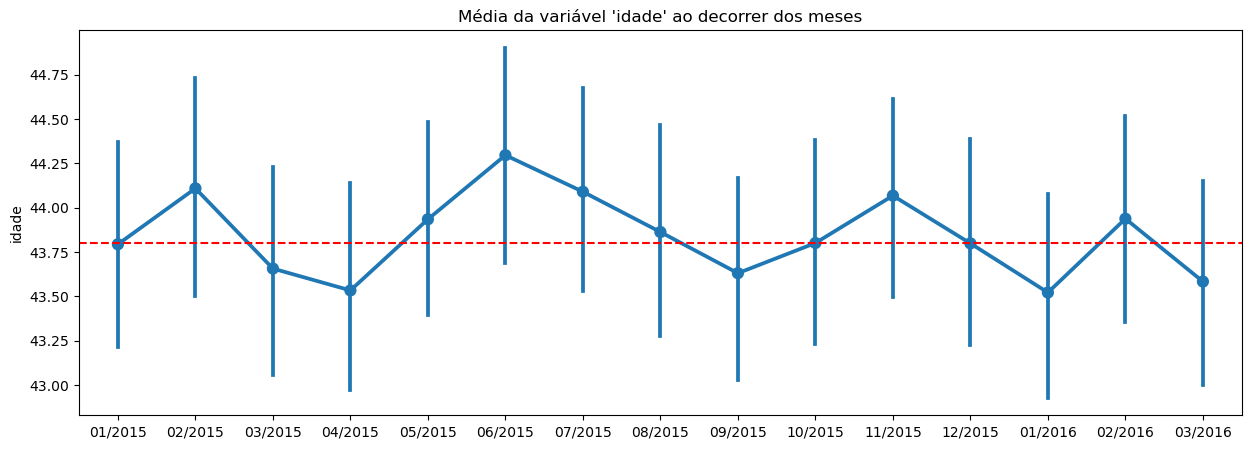

In [14]:
gera_grafico_continuas('idade')

### Gráfico do tempo médio de emprego ao decorrer dos meses

* Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

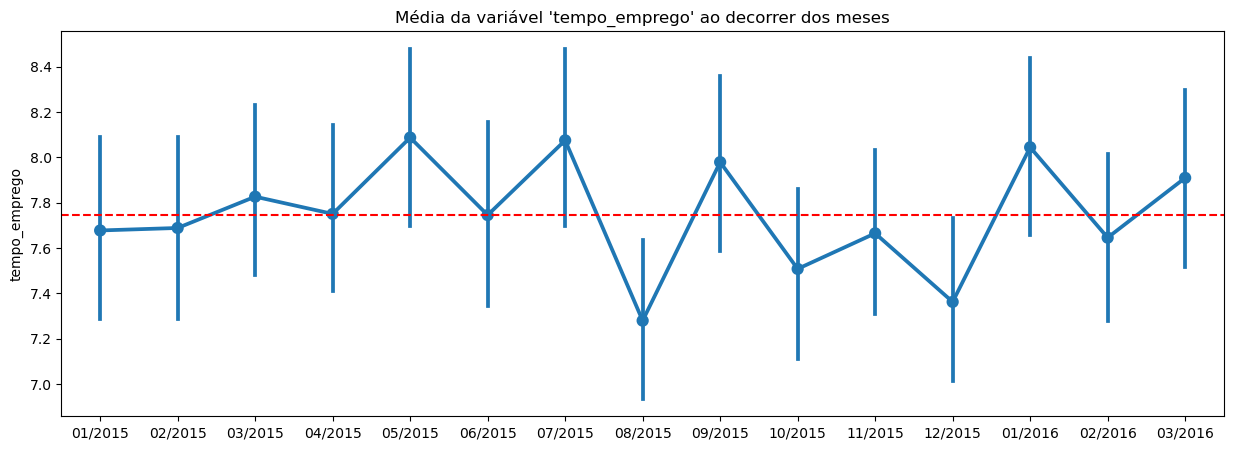

In [15]:
gera_grafico_continuas('tempo_emprego')

### Gráfico da quantidade média de filhos ao decorrer dos meses

* Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

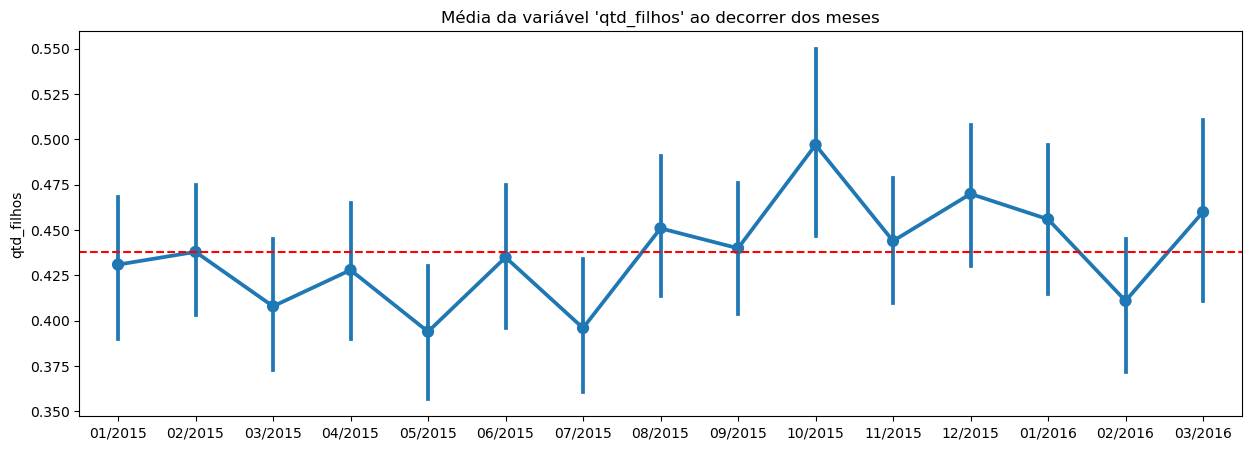

In [16]:
gera_grafico_continuas('qtd_filhos')

### Gráfico da quantidade média de pessoas por residência ao decorrer dos meses

* Com um intervalo de confiança de 90%, não é possível afirmar que a variável teve uma mudança significativa na estabilidade.

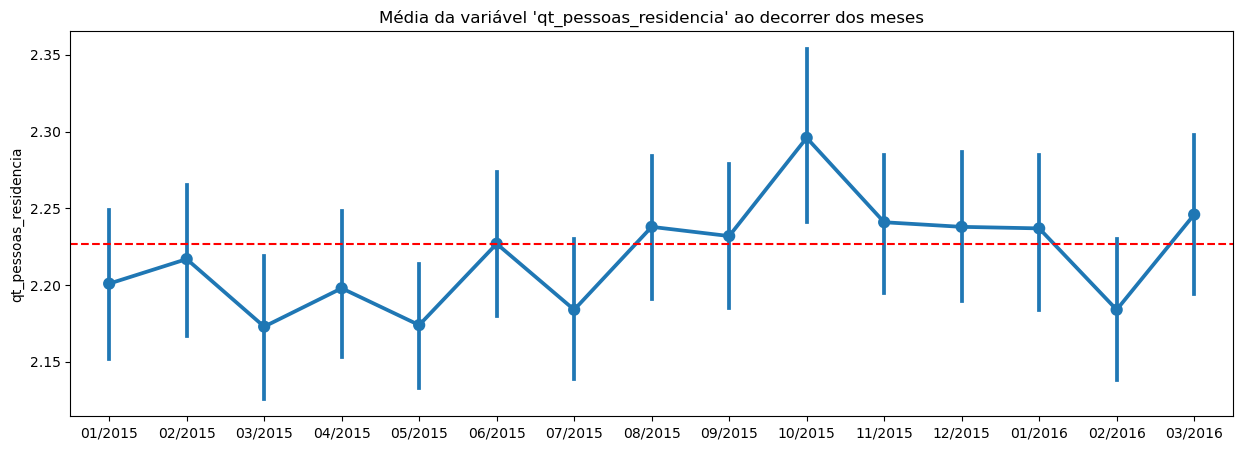

In [17]:
gera_grafico_continuas('qt_pessoas_residencia')